In [6]:
%%html
<style>
table {margin-left: 0 !important}
</style>

# IN-STK5000 - Project 1: Credit
### Group 9: Anette Fredriksen, Adrian Eriksen, Maren Aamodt

# Contents:
- [Introduction](#introduction)
- [Part 1: Constructing a model](#part1)
    * [A closer look at the dataset](#part1_section1)
    * [Model development](#part1_section2)
- [Part 2: Risks and privacy](#part2)
    * [Risks concerning our model](#part2_section1)
    * [Data privacy](#part2_section2)
- [Part 3: Fairness](#part3)
    * [Choosing a concept of fairness](#part3_section1)
    * [Some statistics](#part3_section2)
    * [Measuring variation](#part3_section3)
    * [Taking amount into account](#part3_section4)
    * [Balancing privacy and utility](#part3_section5)
- [Sources](#sources)

# Introduction <a class="anchor" id="introduction"></a>

This project is about making a model that can predict if a loan is profitable, and grant loans accordingly. To train our model, we are using a dataset containing data from German loaners. The original data set can be viewed [here](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)).

In the first part our project, we develop the model that should predict whether a loan should be granted or not. We also reflect on the dataset features.

In part two, privacy is taken into consideration. We discuss whether the data is secured sufficiently, and how to improve the privacy in our model. 

In the third and final part of the project, the fairness of our model is analysed and improved.

# Part 1: Constructing a model <a class="anchor" id="part1"></a>

## A closer look at the dataset <a id="part1_section1"></a>

### The target attribute
The label in the dataset represent information about people who has taken out a loan, and the response variable is if they paid the loan back or not. In the original dataset, the value $1$ represents the loan being paid back, and the value $2$ that they did not. However, in our project we use action that have values $1$ and $0$, where $1$ is when the money is paid back and $0$ when it is not. Therefore we need to map $2$ to $0$, and this is done with a function added to TestLending.py. 

### Important features
Some features will be more central than others in the evaluation of a loaners credibility. It is reasonable to assume that *employment*, *credit history* and *other debtors* are some of the variables that have most influence on the prediction process. 

If a person is not employed, they would have a very low income, which would affect the ability for downpayment. Similarly, if a person has a bad credit history, or has other debtors as well, their ability to pay back the loan could be worsened.

### The feature characteristics
Our dataset has both numerical and qualitative features. They are listed separately below:


| Numerical features |     |                |             |        |         |         |
|:-------------------|:----|:---------------|:------------|:-------|:--------|:--------|
|  Duration          | Age | Residence time | Installment | Amount | Persons | Credits |  

| Qualitative features |       |                    |                |         |          |         |
|:---------------------|:------|:-------------------|:---------------|:--------|:---------|:--------|
| Account balance      | Job   | Other installments | Employment     | Housing | Property | Foreign |
| Credit history       | Phone | Other debtors      | Marital Status | Purpose | Savings  |  
   
   
(Is this section necessary?)
The training and test dataset is from a German bank. In the dataset it is 20 features and one response variable: 'checking account balance', 'duration', 'credit history', 'purpose', 'amount', 'savings', 'employment', 'installment', 'marital status', 'other debtors', 'residence time', 'property', 'age', 'other installments', 'housing', 'credits', 'job', 'persons', 'phone', 'foreign'.

### Is the dataset suitable?
It is uncertain that the variables that make germans pay back a loan are the same as they would be for e.g. norwegians. Also, the dataset was collected in 1994, which could mean that some of the features, e.g. the 'has a phone' feature, is outdated. This should be taken into consideration before applying this dataset to predict credibility in the current time, and in other countries than Germany. 

## Model development <a id="part1_section2"></a>

### The chosen classifier
We chose Naive Bayes to fit our model, this is done with sklearn using Multinomial Naive Bayes. Naive Bayes is good with classification problems where. 

### Predicting the utility
The *expected_utility()* function is used to calculate the probable income or loss. It will be a loss of income if the person does not pay back, so if the *fit()* function predicts a low possibility of getting paid back, we will not grant a loan.

To predict the expected utility, we used the formula

$$E_\textrm{utility} = 
P(\textrm{paying back}) \cdot \textrm{amount} 
\cdot (1 + \textrm{rate})^{\textrm{duration}} 
- (1 - P(\textrm{paying back})\cdot \textrm{amount}$$

The $P(\textrm{paying back})$ is predicted in the *predict_proba()* function, which returns the probability of the person downpaying the loan. The loan *amount*, loan *duration* and *rate* are all parametres gathered from the class' self.

We did not use *action* as a parameter in *expected_utility()*, like the random_baker did. Instead we used the prediction percentage from fit to chose an "action".

### The functions explained
`fit()` fits the Naive Bayes model. 

`set_interest_rate()` sets the interest rate.

`predict_proba()` uses the model made in *fit()* to predict probability for a given x (person).

`expected_utility()` uses *predict_proba()* to get a prediction probability.

`get_best_action()` uses *expected_utility()* and checks if the expected return is possitive, if the return is positive a loan is granted. 

As explained in the beginning of the part one section, we made a helper function in *TestLending.py*, called mapping. Mapping sets 2 to 0 in the response variable (meaning that the loan was not payed back). 

## Comparison of results 

**Results for AnAdMa_banker:**

```
Average utility: 1173660.897963784

Average return on investment: 180.2118483552568
```

**Results for random_banker:**
```
Average utility: 566096.257992558

Average return on investment: 83.0732642835408
```

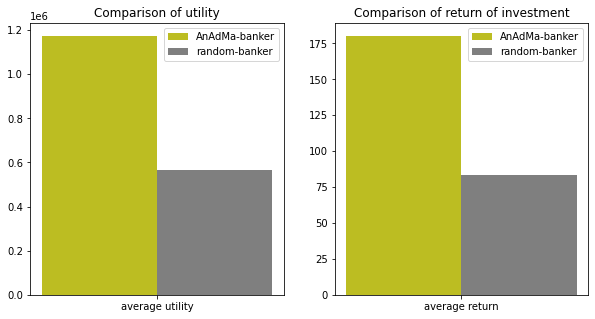

We can see that our model outperform *random_banker* by a lot.
This is expected, since the random banker is not considering any variables when granting loans. Our average return on investment is 216,9% higher than random_banker. 

# Part 2: Risks and privacy <a class="anchor" id="part2"></a>

## Risks concerning our model <a id="part2_section1"></a>

### Does our policy maximise revenue?
We can never completley assure that our policy maximises revenue, but we can maximise expected revenue. The reason for this is that one can never be sure whether a person will be able to repay a loan.

### The uncertainty of limited and/or biased data
Taking the uncertainty of our limited and/or biased data into account is hard when we do not have a different dataset to test it up against. If we had this second dataset, we would at least be able to somewhat increase our certainty, based on the fact that we would have information from more than one source. Especially now, during a pandemic, we find it harder to trust data regarding economy and credit worthiness that's collected pre-corona. One way we could deal with this would be to create new data based on the one we posses, but if our original data is inherently flawed, then this might make the model worse. Another way would be to increase the expected utility necessary for granting loans, so that we take fewer risks. We could obviously also increase the interest rate, but in a real world scenario this might just lead to fewer customers and reduce our income. 

### The risks of our model being flawed (and how to handle it)
If it turns out our models predictions are in fact wrong, and we have decided credit for thousands of people based on it, it could possibly result in a disastrous loss of capital. To prevent this, there are a few ways we could minimize risk.

First of all, we could start out small with deciding credit for e.g. 1000 people. After that we could see how well the model performed and decide whether to make any adjustments. 

Another option is to start with only granting loans under a certain amount to make sure that we don't go bankrupt if our model is wrong. We could also create a threshold by finding the standard deviation and mean of expected utility and only grant loans within a given range.

Proposed algorithm: We set a maximum loan limit, because the loss would be greatest for large loans. Also, we set a minimum for the expected utility, so that loans with low profit (and smaller chance of the loaner repaying the loan) are rejected. In this way, we minimize the damage if it turns out our model is flawed. Also, as explained above, we limit the number of loaners to 1000 in our first run.

***Pseudocode: risk minimization*** 

---
```
loans_left = 1000

if (loan_size < max_loan 
    and expected_utility > min_utility 
    and loans != 1000):
       grant loan
       loans_left -= 1
else:
       do not grant loan
```
---

## Data privacy <a id="part2_section2"></a>

### Privacy concerns 
The dataset contains several sensitive features, e.g. the status of their current checking account, credit history and savings accounts. While this in itself might not raise any concerns, one can use their employment status, personal status and sex, property, housing status, age and job to concievably learn who this person is. This may not apply for all people in the database, but a lot of people have little regard for what information they make publicly available through Facebook and other social media. One must also consider the fact that this is the kind of information sought after by hackers, who usually have sophisticated ways of retrieving data from different sources. If the data in this database was made publicly available, it would not be hard for someone with the right skill set to learn the name of most people in the database. 

### Private database - public decisions
Making the database only available to the bank would significantly increase the privacy of the data. Making the credit decisions public would not necessarily affect this if there was no other metadata (like the time of the request) published. Given that we have two counters, one for yes and one for no, we find it hard to believe that someone could learn whether a given person is credit worthy based on this alone. That being said, the database only being known to the bank, doesn't necessarily guarantee security. There is always the risk of security breaches, whether it's through phishing attacks or employees selling information. The fact that the numbers are published, does relay the information that we have a database possibly containing valuable information.

### Our privacy model

There are a few different ways to do protect the data of the people in the training set. We opted to use the laplace function for differential privacy on the numerical data and just implemented a random choice for the quantitative features. We could also use feature selection by removing columns should they prove to not affect the outcome of the model. Removing unnecessary features could also improve the fairness in our model.

People applying for new loans (e.g. the test set) will go through the same noise algorithms as the people in the training set. 

#### Function implementation
To implement a private descision making mechanism, we added some functions to *TestLending.py*. First, we made a function `qua_noise(X)` that adds a *random.choice* variable to the quantitive features of *X*. 
Similarly, our `laplace_func(X)` function adds Laplace noise to the numeric features of *X*. Finally, the function `add_noise()` takes the *train* and *test* sets as arguments, and calls on the two noise adding functions described above to add noise to the sets. 

The noise is added before the sets are fitted to our decision making model. 

#### Loss in utility after adding privacy mechanisms
When privacy mechanisms are added, it is reasonable that some of the models utility gain could be lost. After running the model with the improved privacy, the mean of the results were:
```
Average utility: 1146573.692159097
Average return on investment: 178.52551597951373
```
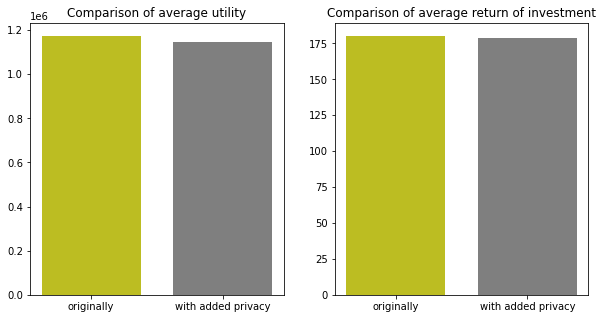

The loss in utility is seemlingly rather small, as the noise we add to the data is insignificant. 


*Using MultinomialNB() gives us some struggles with adding noise to the data as it can't take in negative values. For the final delivery we are conisdering different algorithms to achieve this. One possible solution is to set all negative values to 0, but this might skew the training.*

# Part 3: Fairness <a class="anchor" id="part3"></a>

## Choosing a concept of fairness <a id="part3_section1"></a>
For this part we originally chose to look at fairness in regards to foreign workers. However, it turned out that only 37 people out of 1000 in our dataset was foreign workers, 34 of which had repaid their initial loan. Because the number of foreign workers was so low, we decided to go for gender equality as suggested in the assignment.  
The first thing we did was to look at the data: 

| Gender | Amount | Repaid | Percentage | 
|:-------|:-------|:-------|:-----------| 
| Female | 310    | 201    | 64.8%      | 
| Male   | 690    | 499    | 72.3%      | 

We see that the majority of the dataset consists of males. One thing we also took note of was that there was 50 people unaccounted for in the code, as they were assigned 'marital status_A91', which is 'single male', but we did not get a column for this when importing the dataset with pandas.  

### Is our policy is fair?
(Maybe find a formal definition of fairness?) Creating a truly fair policy is close to impossible. Given that our policy will try to maximize utility, there will always be edge-cases that gets granted a loan when they shouldn't and vice versa. However, we can 

## Some statistics <a id="part3_section2"></a>

Because we have chosen to focus on fairness between the genders, it is natural to look at the what separates them in the dataset. First of all, we can look at their abilities to pay back their loans.

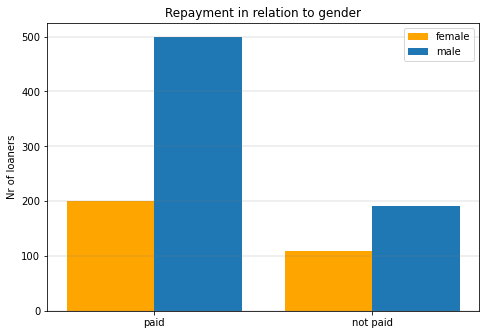

Since the dataset is unevenly distributed between the genders, it is more sensible to compare the results of the probabilities of paying back, given that the person is a certain gender, i.e. the conditional probabilities. 

In the dataset, we have 
- $P($repaid$|$male$) = 72.32 \%$
- $P($repaid$|$female$)= 64.84 \%$.

We can see that there are slightly less females paying back their loans.

Further, it is interesting to see if there are other differences between the genders. Here are some of the distributions:

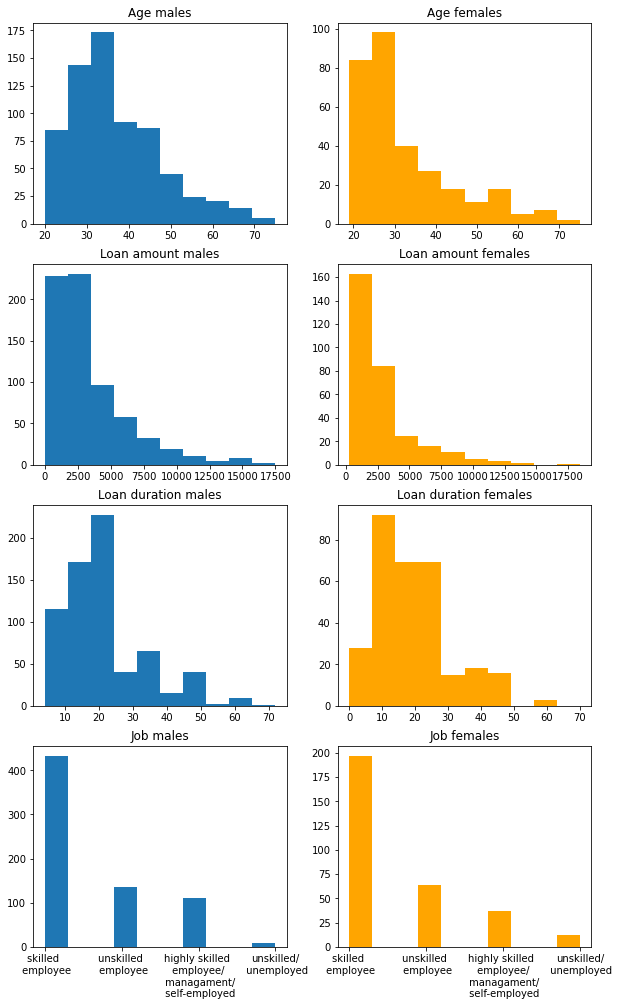

The distributions does not show any significant differences between the genders. It is however some slight variations, and it would be interesting to check the averages in the numerical features.

|feature |avg male|avg female|
|--------|--------|----------|
|duration|21.56   |19.44     |
|age	 |36.78   |32.80     |
|residence time	|2.83|2.87|
|installment	|3.04|2.83|
|amount	|3448.04|2877.77|
|persons	|1.20|1.05|
|credits	|1.44|1.33|

Some possible conclusions: The average female loaner is a few years younger than the average male loaner. Males loans more in average. The male scores slightly higher in the features *installment*, *persons*, and *credits*. 

Additionally, we can inspect the loaners age, loan amount and duration further. We scatter plot the amount and loaner age with colors separating females (*orange*) and males (*blue*):

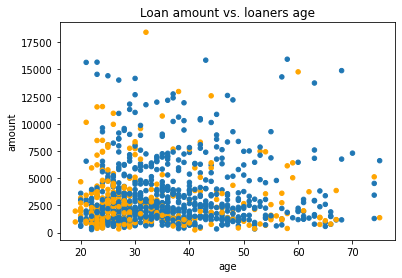

From the scatter plot it seems that there are more males getting loans higher than 10 000 euros. What we have to keep in mind is that there are a lot more males in the data set. To see the actual difference in loan amounts between the genders, we have to look at the conditional probabilities:

- $P($loan over 10 000$|$female$) = 2.90 \%$
- $P($loan over 10 000$|$male$) = 4.49 \%$

In conclusion, there are slightly fewer females getting loans exceeding 10 000 euros.

The difference can also be studied with a box plot:

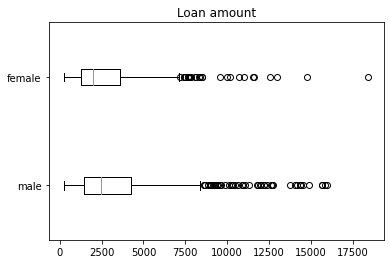

In the same way, we can observe the difference in the loan duration:
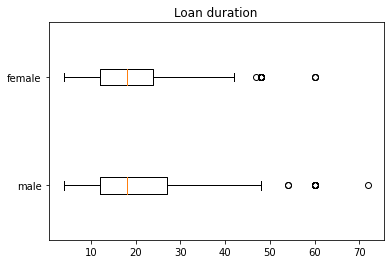

From the box plot, it is clear that the difference between the genders is modest.

## Measuring variation <a id="part3_section3"></a>
*For balance (or calibration), measure the total variation of the action (or outcome) distribution for different outcomes (or actions) when the sensitive variable varies.*

## Taking amount into account<a id="part3_section4"></a>
*Advanced: What would happen if you were looking at fairness by also taking into account the amount of loan requested?*

## Balancing fairness and utility <a id="part3_section5"></a>
*Advanced: Using stochastic gradient descent, find a policy that balances out fairness and utility.*

# Sources <a class="anchor" id="sources"></a>

- Christos Dimitrakakis: "*Machine learning in science and society*" (August 18, 2020). Collected from [GitHub](https://github.com/olethrosdc/ml-society-science/blob/master/notes.pdf).

## Comments from Dirk:
- Reflect on the data a little more. What outcome is recorded in the dataset? What decision are you facing. It would be good to comment on that in you final submission. 

- In the code, it could be cleaner to return the expected utility for one given action, and compare those explicitly in the decision function.

- Also, prefer docstrings over comments in the code. 

- For your final submission, please send in the code, not just point to GitHub

- When quoting expected utilities, give a confidence interval and if possible plot a histogram instead of giving a point estimate.